In [ ]:
!pip install numpy
!pip install pandas
!pip install kagglehub
!pip install requests

In [ ]:
import numpy as np
import pandas as pd
import kagglehub

In [9]:
path = kagglehub.dataset_download('tmdb/tmdb-movie-metadata')
print ('Path to dataset files = ', path)

Path to dataset files =  C:\Users\user\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


In [22]:
df1 = pd.read_csv(str(path +'/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path +'/tmdb_5000_movies.csv'))

In [ ]:
df2.head(3)

In [23]:
df1.columns = ['id', 'title_1', 'cast', 'crew']
df2 = df2.merge(df1, on='id')
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
C = df2['vote_average'].mean()
print (C)

m = df2['vote_count'].quantile(0.9)
print (m)

6.092171559442016
1838.4000000000015


In [27]:
q_movie = df2.copy().loc[df2['vote_count'] >= m]
q_movie.shape

(481, 23)

In [29]:
def weithted_rating(x, m=m, C=C):
    v = [x['vote_count']]
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(m+v)*C)

q_movie['score'] = q_movie.apply(weithted_rating, axis=1)

In [30]:
q_movie['score'].head()

0     [7.050669301008783]
1     [6.665696105464818]
2      [6.23939600832406]
3     [7.346720532407277]
4    [6.0963679070457815]
Name: score, dtype: object

In [31]:
q_movie = q_movie.sort_values('popularity', ascending = False)
q_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew,score
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",[6.311705962317565]
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",[7.809478504799392]
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",[7.212652001408683]
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",[7.613005439784308]
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",[7.019213538345571]


In [ ]:
!pip install matplotlib

Text(0.5, 1.0, 'Popular Movies')

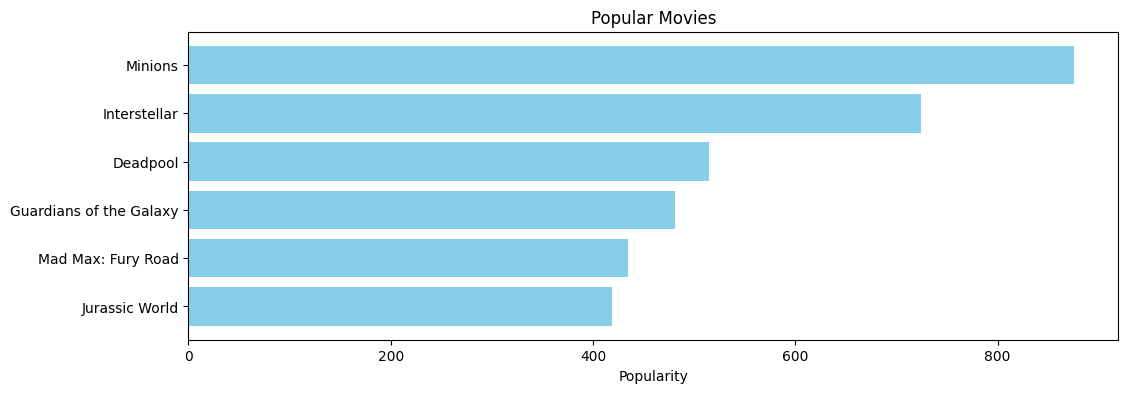

In [32]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [33]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [ ]:
!pip install scikit-learn

In [34]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [35]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [36]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [37]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Star Wars')

1990                     The Empire Strikes Back
1490                          Return of the Jedi
833                                Shanghai Noon
1290                    Baahubali: The Beginning
2864                                   Arbitrage
2556                          The Princess Bride
410                                Mirror Mirror
2929                History of the World: Part I
1045    The Princess Diaries 2: Royal Engagement
2232                                 Topsy-Turvy
Name: title, dtype: object

In [39]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [52]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [53]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [54]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [55]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [56]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [57]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [59]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [60]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [58]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [62]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [63]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [ ]:
import requests
import json
import tkinter as tk

api_key = 'fb6f4167faa7c82e54bb60e160679fde'

root = tk.Tk()
root.title ('The Movie DataBase')
root.geometry ('500x500')

label_movie = tk.Label(root, text='Movie ID')
label_movie.pack(pady=(15,5))
entry_movie = tk.Entry(root, width = 25)
entry_movie.pack()

show_variable = tk.StringVar()
show_area = tk.Label(root, 
     textvariable = show_variable,
     font = ('Helvetica', 12),
     bg = 'lightyellow',
     wraplength = 380,
     justify = 'left')
show_area.pack(pady=20, padx=10, fill='both', expand=True)

def print_movie():
    movie_id = entry_movie.get()
    print ('Moive ID = ', movie_id)
    print ('-'*30)

button_print = tk.Button(root, text = 'Print', command = print_movie)
button_print.pack(pady=15)

def print_recommendations():
    movie_id = entry_movie.get()
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    response = requests.get(url)
    data = response.json()
    title_name = data.get('title')
    print ('Title Name = ', title_name)
    print ('-' * 30)

    show_variable.set(get_recommendations(title_name, cosine_sim2))

button_revenue = tk.Button(root, text='Recommendations', command=print_recommendations)
button_revenue.pack(pady=15)

root.mainloop()

Title Name =  Star Wars
------------------------------


In [ ]:
!pip install numpy
!pip install pandas
!pip install kagglehub
%pip install matplotlib

In [4]:
path = kagglehub.dataset_download('tmdb/tmdb-movie-metadata')
print('TMDB path = ',path)

100%|██████████| 8.89M/8.89M [00:01<00:00, 7.01MB/s]

Extracting files...


TMDB path =  C:\Users\student\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


In [ ]:
import numpy as np
import pandas as pd
import kagglehub

In [ ]:
import requests
import json
import tkinter as tk

api_key = '51c8096400dd06772c1042b9dbd544c3'

root = tk.Tk()
root.title ('The Movie DataBase')
root.geometry ('500x500')

label_movie = tk.Label(root, text='Movie ID')
label_movie.pack(pady=(15,5))
entry_movie = tk.Entry(root, width = 25)
entry_movie.pack()

show_variable = tk.StringVar()
show_area = tk.Label(root, 
     textvariable = show_variable,
     font = ('Helvetica', 12),
     bg = 'lightyellow',
     wraplength = 380,
     justify = 'left')
show_area.pack(pady=20, padx=10, fill='both', expand=True)

def print_movie():
    movie_id = entry_movie.get()
    print ('Moive ID = ', movie_id)
    print ('-'*30)

button_print = tk.Button(root, text = 'Print', command = print_movie)
button_print.pack(pady=15)

def print_revenue():
    movie_id = entry_movie.get()
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    response = requests.get(url)
    data = response.json()
    revenue_value = data.get('revenue')
    print ('Revenu = ', revenue_value)
    print ('-' * 30)

    show_variable.set(revenue_value)

button_revenue = tk.Button(root, text='Revenue', command=print_revenue)
button_revenue.pack(pady=15)

root.mainloop()

In [22]:
df1 = pd.read_csv(str(path+ '/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path+ '/tmdb_5000_movies.csv'))
print('df1 shape is', df1.shape,'\ndf2 shape is', df2.shape)
#print('df2 shape is', df2.shape)

df1 shape is (4803, 4) 
df2 shape is (4803, 20)


In [23]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
print('df2 shape is', df2.shape)

df2 shape is (4803, 23)


In [24]:
C= df2['vote_average'].mean()
print(C)
m= df2['vote_count'].quantile(0.9)
print(m)
q_movies = df2.copy().loc[df2['vote_count'] >= m]
print(q_movies.shape)

6.092171559442016
1838.4000000000015
(481, 23)


In [25]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [26]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [27]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(3)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020


Text(0.5, 1.0, 'Popular Movies')

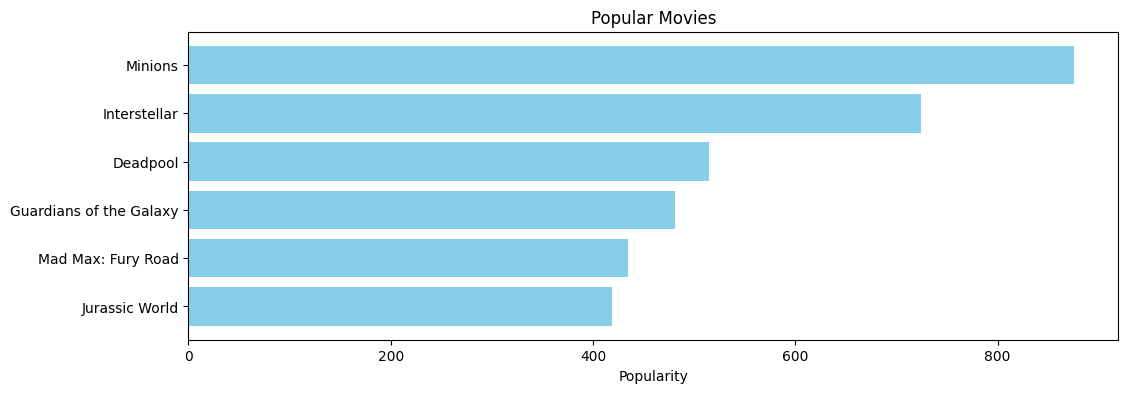

In [30]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [31]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [36]:
get_recommendations('Star Wars',cosine_sim2)

NameError: name 'get_recommendations' is not defined

In [37]:
import requests
import json
import tkinter as tk

api_key = '51c8096400dd06772c1042b9dbd544c3'

root = tk.Tk()
root.title ('The Movie DataBase')
root.geometry ('500x500')

label_movie = tk.Label(root, text='Movie ID')
label_movie.pack(pady=(15,5))
entry_movie = tk.Entry(root, width = 25)
entry_movie.pack()

show_variable = tk.StringVar()
show_area = tk.Label(root, 
     textvariable = show_variable,
     font = ('Helvetica', 12),
     bg = 'lightyellow',
     wraplength = 380,
     justify = 'left')
show_area.pack(pady=20, padx=10, fill='both', expand=True)

def print_movie():
    movie_id = entry_movie.get()
    print ('Moive ID = ', movie_id)
    print ('-'*30)

button_print = tk.Button(root, text = 'Print', command = print_movie)
button_print.pack(pady=15)

def print_recommendations():
    movie_id = entry_movie.get()
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    response = requests.get(url)
    data = response.json()
    title_name = data.get('title')
    print ('Revenu = ', title_name)
    print ('-' * 30)

    show_variable.set(get_recommendations(title_name,cosine_sim2))

button_recommendations = tk.Button(root, text='Recommend Movie', command=print_recommendations)
button_recommendations.pack(pady=15)

root.mainloop()

Moive ID =  11
------------------------------
Revenu =  Star Wars
------------------------------


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\student\AppData\Local\Programs\Python\Python314\Lib\tkinter\__init__.py", line 2082, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "C:\Users\student\AppData\Local\Temp\ipykernel_11876\491971800.py", line 42, in print_recommendations
    show_variable.set(get_recommendations(title_name,cosine_sim2))
                      ^^^^^^^^^^^^^^^^^^^
NameError: name 'get_recommendations' is not defined. Did you mean: 'print_recommendations'?


In [35]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [34]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

NameError: name 'cosine_sim' is not defined